# Essential Machine Learning for Physicists

<p align="right">
  <img src="../../misc/tum-logo.png" width="93" align="right" />
  <img src="../../misc/sixt-logo.png" width="70" align="right" /> 
<left><em>&copy; Zinonas Zinonos</em></left>
    
<left><em>For more information, visit <a href='https://github.com/zinon/essential-machine-learning-for-physicists'>essential-machine-learning-for-physicists</a></em></left>.
___
</p>

# Goal of this Exercise

We have learned in the lecture about feature engineering and different linear regression techniques. 
:et's test all your new skills with a project exercise in Machine Learning.

We'll start off with using the final version of the Ames Housing dataset we worked on through the feature engineering section of the course. 
Your goal will be to create a Linear Regression Model and train it on the data with the optimal parameters. These optimimal hyperparameters will be extracted using a grid search approach.
Then, we will evaluate the model's capabilities on a hold-out dataset.

# Load Data

Let's load our cleaned and processed dataset. Note that, this dataset has not missing data, or severe outliers, or categorical features. All categorical features have dummified leading to onehot-encoded feature columns. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("../../datasets/AmesHousingProcessed.csv")

In [3]:
df.sample(4)

,Unnamed: 0,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
254,254,82.00000,14235,6,8,1900,1993,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2923,2923,77.00000,10010,5,5,1974,1975,0.0,1071.0,123.0,...,0,0,0,0,1,0,0,0,1,0
1382,1382,74.55102,7703,6,8,1978,1978,40.0,450.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2794,2794,90.00000,11250,7,5,1995,1996,0.0,685.0,0.0,...,0,0,0,0,1,0,0,0,1,0


# 1. Plot the target distribution

The label we are trying to predict is the `SalePrice` column. 
Import the relevant visualization libraries and plot our target column.

In [1]:
# our lovely imports here
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import importlib.metadata
print(importlib.metadata.version("scikit-learn"))

1.5.2


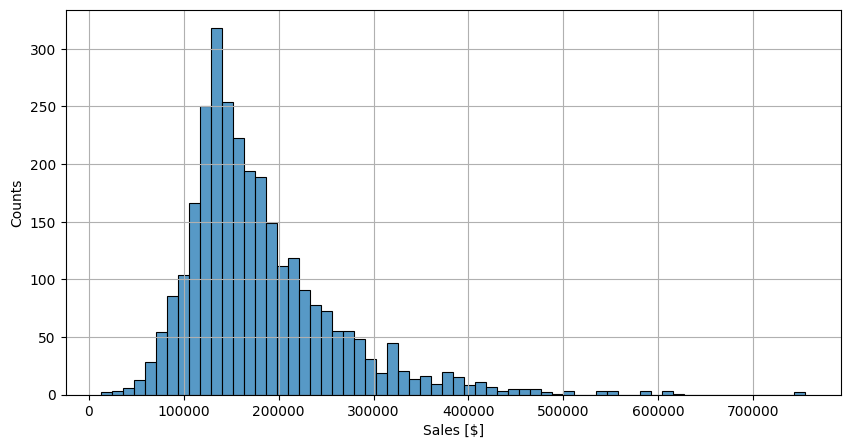

In [5]:
# code here
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x='SalePrice', data=df, ax=ax)
plt.xlabel("Sales [$]")
plt.ylabel("Counts")
plt.grid()

In [243]:
# I'm providing you the expected result; do not execute me!

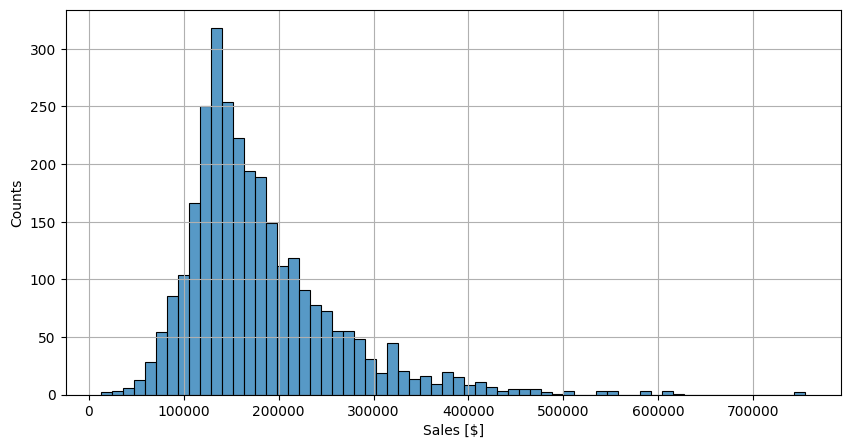

In [244]:
# I'm providing you the expected result; do not execute me!

# 2. Show the top-ten positively correlated features to the target 

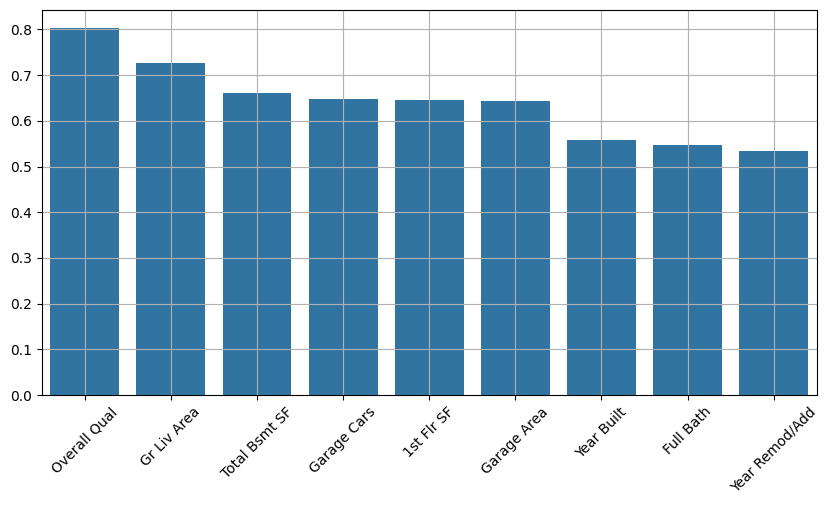

In [6]:
# code here
df_corr = df.corr()[["SalePrice"]].sort_values(by="SalePrice", ascending=False).iloc[:10].drop("SalePrice")
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=df_corr.index.values, y = df_corr["SalePrice"].values, data=df_corr, ax=ax)
plt.xticks(rotation=45)
plt.grid()

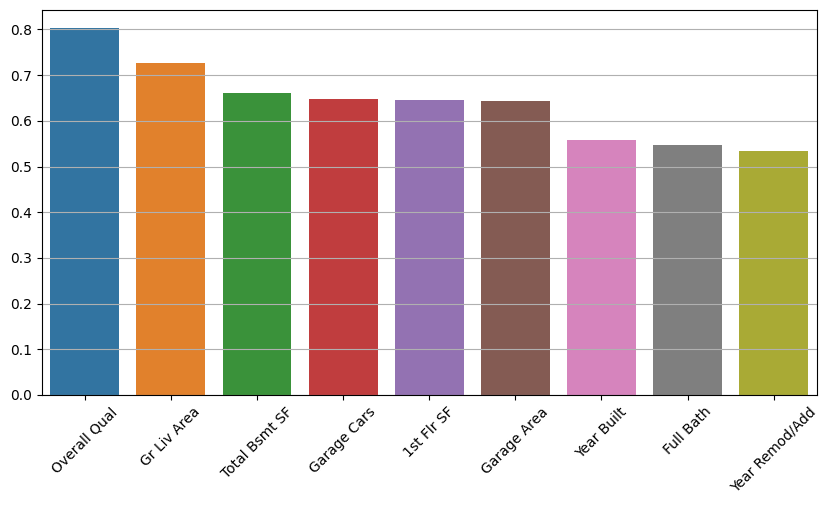

In [246]:
# I'm providing you the expected result; do not execute me!

# 3. Separate out the data into $X$ features and $y$ labels

In [7]:
# code here
X = df.drop(["SalePrice"], axis=1)
y = df["SalePrice"]
print(f"X: {X.shape}  y:{y.shape}")

X: (2925, 274)  y:(2925,)


In [12]:
# I'm providing you the expected result; do not execute me!

# 4. Train & Test Datasets

Now, we want to create our train and test partitions. 
Use `scikit-learn` to split up `X` and `y` into a training set and test set. 
Since we will later be using a Grid Search strategy, set the test proportion to 20% of the total population. 
To get the same data split as the solutions notebook, you can specify `random_state = 77`.

In [8]:
# import(s) here
from sklearn.model_selection import train_test_split

In [9]:
# code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=77)
print(f"X train: {X_train.shape}  X test:{X_test.shape}")

X train: (2340, 274)  X test:(585, 274)


In [251]:
# I'm providing you the expected result; do not execute me!

In [10]:
# I'm providing you the expected result; do not execute me!

X train: (2340, 274)  X test:(585, 274)


# 5. Highest correlated feature

Create the scatter plot between the target and the highest correlated feature. Use the train set.

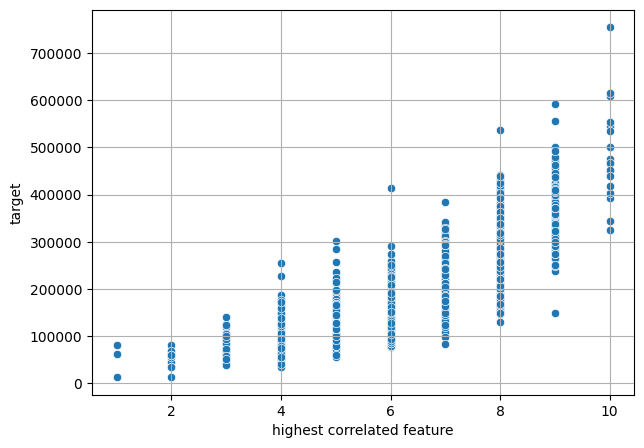

In [10]:
# code here
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(x=X_train["Overall Qual"], y = y_train, ax=ax)
plt.xlabel("highest correlated feature")
plt.ylabel("target")
plt.grid()

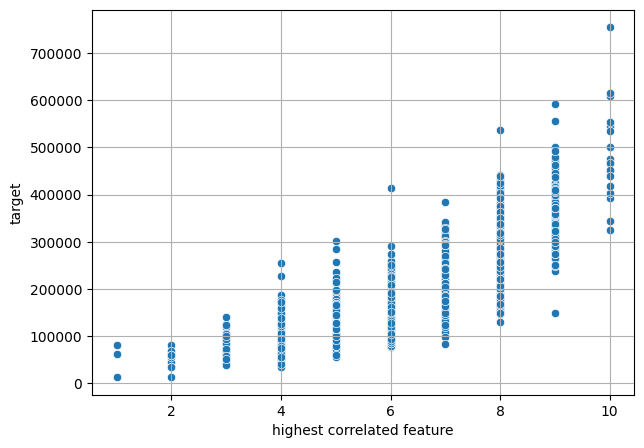

In [254]:
# I'm providing you the expected result; do not execute me!

# 6. Feature Scaling

The dataset features has a variety of scales and units. 
For optimal regression performance, we should consider scaling the $X$ features. For this purpose, use the `StandardScaler` class from `scikit-learn`.
Take carefuly note of what to use for `fit()` vs what to use for `transform()`.

In [11]:
# import here
from sklearn.preprocessing import StandardScaler

In [12]:
# code here

# scaler class instance
scaler = StandardScaler()
# learn on the ??? set(s) and apply on the ??? set(s)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [257]:
# I'm providing you the expected result; do not execute me!

In [258]:
# I'm providing you the expected result; do not execute me!

# 7.1 Default Regression Model

Let's create a regression eastimator. We will use an Elastic Net model. 
1. Import he module
2. Create an instance of default `ElasticNet` model with `scikit-learn`. 
3. Fit the model. 
4. Show the total number of model's coefficients. 
5. Show the first 4 coefficients. 

In [13]:
# import here
from sklearn.linear_model import ElasticNet

In [14]:
# code here for instance
model = ElasticNet()

In [15]:
# code for model fit here
model = model.fit(X=X_train_scaled, y=y_train)

In [16]:
# code for coefficients number here
model.coef_.shape

(274,)

In [17]:
# code for the first coefficients values here
model.coef_[:4]

array([6.92453808e+00, 2.13711928e+03, 3.59716416e+03, 7.72896006e+03])

In [264]:
# I'm providing you the expected result; do not execute me!

In [265]:
# I'm providing you the expected result; do not execute me!

In [266]:
# I'm providing you the expected result; do not execute me!

In [267]:
# I'm providing you the expected result; do not execute me!

(274,)

In [268]:
# I'm providing you the expected result; do not execute me!

array([   6.92453808, 2137.11927651, 3597.16416345, 7728.9600562 ])

# 7.2 Evaluation of the Default Model

Make predictions on the train & test sample.

Evaluate the model using the following metrics:

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

Report the values for each of the metrics.

In [18]:
# imports here
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
# predictions code here
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# for later usage
y_test_pred_default = y_test_pred.copy()

In [20]:
# metrics code here
def evaluate(y_true, y_pred):
    return { 
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE" : mean_squared_error(y_true, y_pred),
        "RMSE" : mean_squared_error(y_true, y_pred, squared=False)
    }

print("Train sample:")
print(evaluate(y_train, y_train_pred))

print("Test sample:")
print(evaluate(y_test, y_test_pred))

Train sample:
{'MAE': np.float64(14579.078211196336), 'MSE': np.float64(491164721.4562012), 'RMSE': np.float64(22162.236382102805)}
Test sample:
{'MAE': np.float64(16944.904527144085), 'MSE': np.float64(814056705.1316713), 'RMSE': np.float64(28531.67897498623)}


C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [272]:
# I'm providing you the expected result; do not execute me!

In [273]:
# I'm providing you the expected result; do not execute me!

In [274]:
# I'm providing you the expected result; do not execute me!

Train sample:
{'MAE': 14579.078211196336, 'MSE': 491164721.4562012, 'RMSE': 22162.236382102805}
Test sample:
{'MAE': 16944.904527144085, 'MSE': 814056705.1316715, 'RMSE': 28531.678974986233}


# 8 Model Optimization
The Elastic Net model has two main parameters:
- `alpha`
- `l1_ratio`. 
We are going to scan over a range of different values for these hyperparameter and find the best setup.

## 8.1 Parameter Space 

Create a dictionary parameter grid of values for the `ElasticNet`. 
Feel free to experiment with these values. Keep in mind, you may not match up exactly with the solution choices. The dictionary should be in the form:

`
{'alpha': [list of selected values], 'l1_ratio': [list of selected values]}
`

In [21]:
# dictionary here
alphas = np.round(np.logspace(-1, 2, 10, dtype=float, endpoint=True), 2)
l1_ratios = [.1, .25, .5, .75, .9, .95, .99, 1]

my_dict = {"alpha" : alphas, "l1_ratio" : l1_ratios}
my_dict

{'alpha': array([  0.1 ,   0.22,   0.46,   1.  ,   2.15,   4.64,  10.  ,  21.54,
         46.42, 100.  ]),
 'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1]}

In [276]:
# I'm providing you the expected result; do not execute me!

{'alpha': array([  0.1 ,   0.22,   0.46,   1.  ,   2.15,   4.64,  10.  ,  21.54,
         46.42, 100.  ]),
 'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1]}

# 8.2 Hyperparameter Grid Search with Cross Validation

Now, we are going to use scikit-learn create a `GridSearchCV` object. `GridSearchCV` performs an exhaustive search over specified parameter values for an estimator.
Afterwards, we are going to run a grid search for the best parameters for our model based on your scaled training data.

The module is imported for you in the next cell.

In [22]:
from sklearn.model_selection import GridSearchCV

### 8.2.1 GridSearchCV Instance
Create a `GridSearchCV` instance with your model and the parameter grid dictionary as inputs. 

1. The parameter `cv` determines the cross-validation splitting strategy. Use `cv=5` which specifies the number of data folds used for the model cross validation (i.e. we train and test the model 5 times on an equivalent number of train & test different datasets).

2. The `scoring` parameter specifies the strategy to evaluate the performance of the cross-validated model on the test set. Set that to `neg_mean_squared_error`, so it tries to minimize the MSE metric.

**Tip:** In case you see messages like `ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, ....` and you want to suppress them, here is a solution. 
The default value for tolerance `tol` is 0.0001 for `ElasticNet` in many scikit-learn versions. 
These warning indicate that the model tolerance is so small that the optimization never reaches a lower value. Try to increase it.

**Tip**: Use Shift+Tab over `GridSearchCV` to read it's docstring.

In [23]:
# code
grid_search = GridSearchCV(cv=5, 
             estimator=ElasticNet(),
             param_grid=my_dict,
             scoring='neg_mean_squared_error',
             verbose = 0)
grid_search

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([  0.1 ,   0.22,   0.46,   1.  ,   2.15,   4.64,  10.  ,  21.54,
        46.42, 100.  ]),
                         'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99,
                                      1]},
             scoring='neg_mean_squared_error')

In [9]:
# I'm providing you the expected result; do not execute me!

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([  0.1 ,   0.22,   0.46,   1.  ,   2.15,   4.64,  10.  ,  21.54,
        46.42, 100.  ]),
                         'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99,
                                      1]},
             scoring='neg_mean_squared_error')

### 8.2.2 Run the parameter scan on your scaled train X features. 

In [24]:
# parameter scan code here
import warnings
from sklearn.exceptions import ConvergenceWarning

# suppress the ConvergenceWarning messages (optional)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    grid_search.fit(X_train_scaled, y_train)

In [281]:
# I'm providing you the expected result; do not execute me!

### 8.2.3 Display the best combination of parameters for your model

In [25]:
# code here 
grid_search.best_params_

{'alpha': np.float64(100.0), 'l1_ratio': 1}

In [283]:
# I'm providing you the expected result; do not execute me!

{'alpha': 100.0, 'l1_ratio': 1}

# 9. Model Evaluation

Evaluate your model's performance on the train and the unseen 20% scaled hold-out set. 
Report the your metrics. What is the model performance you can achieve in your notebook?

In [26]:
# fun code here
y_train_pred = grid_search.predict(X_train_scaled)
y_test_pred = grid_search.predict(X_test_scaled)

# now, evaluate the model
print("Train sample:")
print(evaluate(y_train, y_train_pred), "\n")

print("Test sample:")
print(evaluate(y_test, y_test_pred))

Train sample:
{'MAE': np.float64(12927.287552283216), 'MSE': np.float64(353045117.3919986), 'RMSE': np.float64(18789.494867930818)} 

Test sample:
{'MAE': np.float64(15899.791379502994), 'MSE': np.float64(612356968.5938706), 'RMSE': np.float64(24745.847502032953)}


C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [285]:
# I'm providing you the expected result; do not execute me!

Train sample:
{'MAE': 12927.287552283215, 'MSE': 353045117.39199847, 'RMSE': 18789.494867930815} 

Test sample:
{'MAE': 15899.791379502994, 'MSE': 612356968.5938702, 'RMSE': 24745.847502032946}


What's the MAE metric achieved with the *default model*?

What's the MAE metric achieved with the *optimized model*?

Does the optimized model improve the model performance?

# 10. Compare Predictions to Truth

## 10.1 Draw the distribution of the true and predicted target

Use your test set.

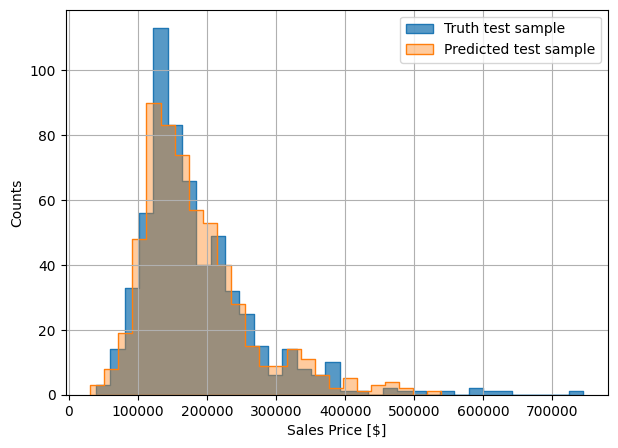

In [27]:
# code here
fig = plt.figure(figsize = (7,5))
ax = fig.subplots()

sns.histplot(x=y_test, ax=ax, label="Truth test sample", element="step")
sns.histplot(x=y_test_pred, alpha=0.4, label="Predicted test sample", element="step")
plt.ylabel("Counts")
plt.xlabel("Sales Price [$]")
plt.grid()
plt.legend();

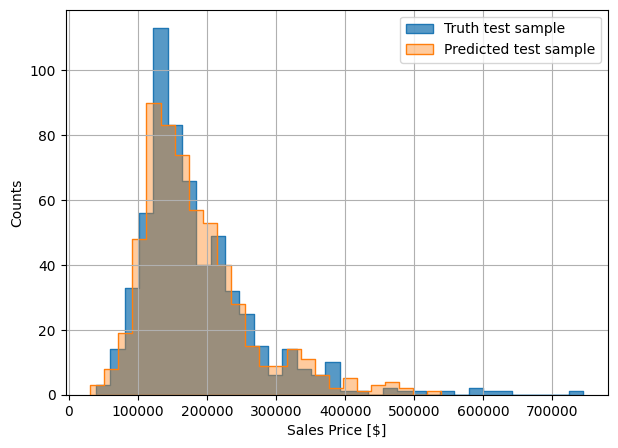

In [287]:
# I'm providing you the expected result; do not execute me!

## 10.1 Draw the scatter plot between the true and predicted target

Overlay your train and test sets.

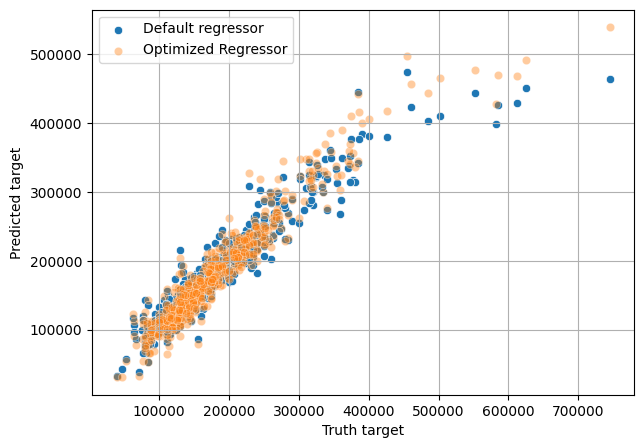

In [29]:
# code here
fig = plt.figure(figsize = (7,5))
ax = fig.subplots()

sns.scatterplot(x=y_test, y=y_test_pred_default, ax=ax, label="Default regressor")
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.4, label="Optimized Regressor")
plt.ylabel("Predicted target")
plt.xlabel("Truth target")
plt.grid()
plt.legend();

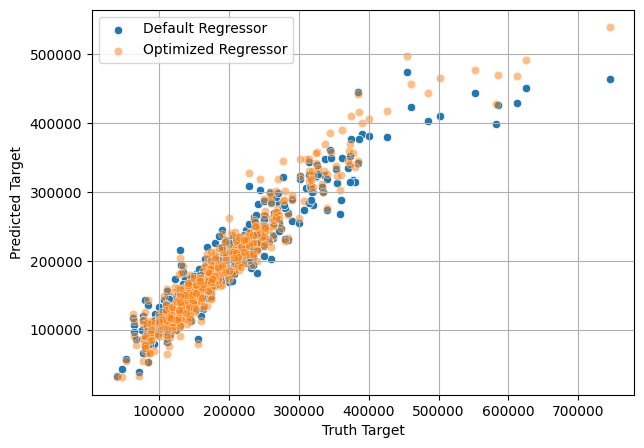

In [288]:
# I'm providing you the expected result; do not execute me!

# 11. Build an ElasticNet Model with Cross Validation

## 11.1 Optimize and Fit again the linear regressor using `ElasticNetCV`

In [30]:
# import ElasticNetCV here
from sklearn.linear_model import ElasticNetCV

In [290]:
# I'm providing you the expected result; do not execute me!

In [31]:
# define your parameter grid dictionary of {"l1_ratio": [your choices], "alphas": [your choices]} here

hyperparameters = {"l1_ratio": np.round(np.logspace(-1, 2, 10, dtype=float, endpoint=True), 2),
                   "alphas": [.1, .25, .5, .75, .9, .95, .99, 1]
                  }

In [292]:
# I'm providing you the expected result; do not execute me!

In [32]:
# build the model here. you may use a higher tolerance than the default value set by scikit-learn, e.g. tol=0.001

elastic_cv = ElasticNetCV(**hyperparameters, tol=0.001)
elastic_cv

ElasticNetCV(alphas=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1],
             l1_ratio=array([  0.1 ,   0.22,   0.46,   1.  ,   2.15,   4.64,  10.  ,  21.54,
        46.42, 100.  ]),
             tol=0.001)

In [294]:
# I'm providing you the expected result; do not execute me!

In [33]:
# Fit the model here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    elastic_cv.fit(X_train_scaled, y_train)

C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1478: RuntimeWarning: overflow encountered in square
  this_mse = (residues**2).mean(axis=0)
C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1478: RuntimeWarning: overflow encountered in square
  this_mse = (residues**2).mean(axis=0)
C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1478: RuntimeWarning: overflow encountered in square
  this_mse = (residues**2).mean(axis=0)
C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1478: RuntimeWarning: overflow encountered in square
  this_mse = (residues**2).mean(axis=0)
C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1478: RuntimeWarning: overflow encountered 

In [296]:
# I'm providing you the expected result; do not execute me!

/home/zinonas/Documents/EssentialML/EssentialML/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1463: RuntimeWarning: overflow encountered in square
  this_mse = (residues**2).mean(axis=0)
/home/zinonas/Documents/EssentialML/EssentialML/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1463: RuntimeWarning: overflow encountered in square
  this_mse = (residues**2).mean(axis=0)
/home/zinonas/Documents/EssentialML/EssentialML/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1463: RuntimeWarning: overflow encountered in square
  this_mse = (residues**2).mean(axis=0)
/home/zinonas/Documents/EssentialML/EssentialML/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1463: RuntimeWarning: overflow encountered in square
  this_mse = (residues**2).mean(axis=0)
/home/zinonas/Documents/EssentialML/EssentialML/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1463: RuntimeWarning: o

In [34]:
# show it's best hyper-params here
print("L1 ratio = %f, Alpha= %f"%(elastic_cv.l1_ratio_, elastic_cv.alpha_))

L1 ratio = 0.460000, Alpha= 0.100000


In [298]:
# I'm providing you the expected result; do not execute me!

L1 ratio = 0.460000, Alpha= 0.100000


In [35]:
# make predictions on the train and test samples here 
y_train_pred = elastic_cv.predict(X_train_scaled)
y_test_pred = elastic_cv.predict(X_test_scaled)

In [300]:
# I'm providing you the expected result; do not execute me!

In [36]:
# evaluate the model using the train and test predictions here

print("Train sample:")
print(evaluate(y_train, y_train_pred), "\n")

print("Test sample:")
print(evaluate(y_test, y_test_pred))

Train sample:
{'MAE': np.float64(13058.95870040942), 'MSE': np.float64(361077644.93234074), 'RMSE': np.float64(19002.043177835923)} 

Test sample:
{'MAE': np.float64(16064.765846513546), 'MSE': np.float64(635722486.0774705), 'RMSE': np.float64(25213.537754100882)}


C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [302]:
# I'm providing you the expected result; do not execute me!

Train sample:
{'MAE': 13058.958700409421, 'MSE': 361077644.9323407, 'RMSE': 19002.04317783592} 

Test sample:
{'MAE': 16064.76584651355, 'MSE': 635722486.0774704, 'RMSE': 25213.53775410088}


How does your outcome compare on the metrics reported above?

## 11.2 Model Coefficients
Rank the coefficients by size and put them in a bar plot. What do you observe?

In [39]:
# ranking goes here

feature_names = X_train.columns.to_list()
df_coeff = pd.DataFrame(elastic_cv.coef_, index=feature_names, columns=["coeff"])
df_coeff=df_coeff.sort_values("coeff", ascending=True)

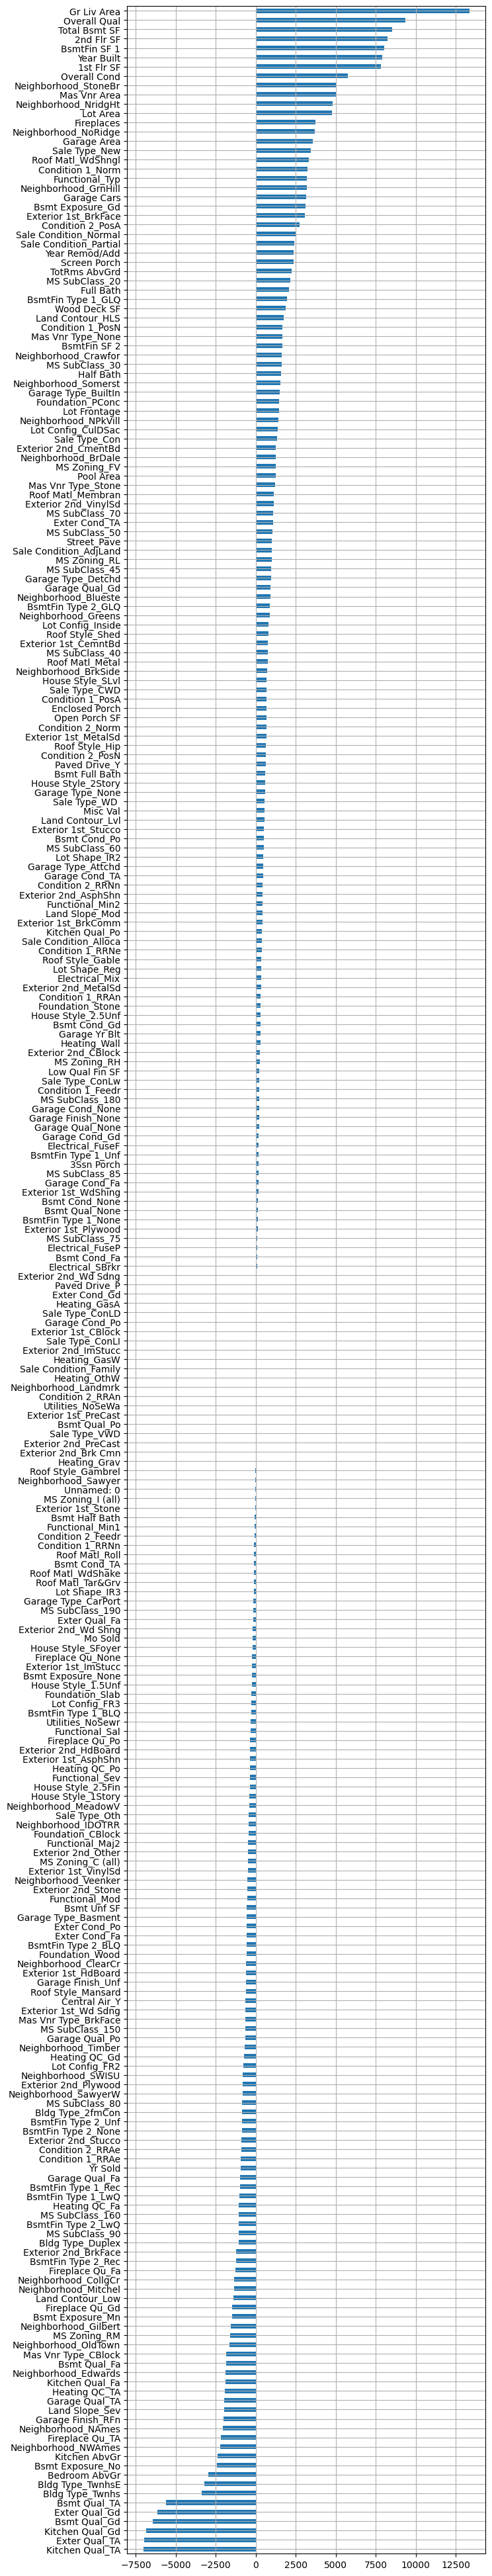

In [41]:
# plotting code
fig = plt.figure(figsize=(7, 50))
ax = fig.subplots()

df_coeff["coeff"].plot.barh(ax=ax)
plt.grid()

In [305]:
# I'm providing you the expected result; do not execute me!

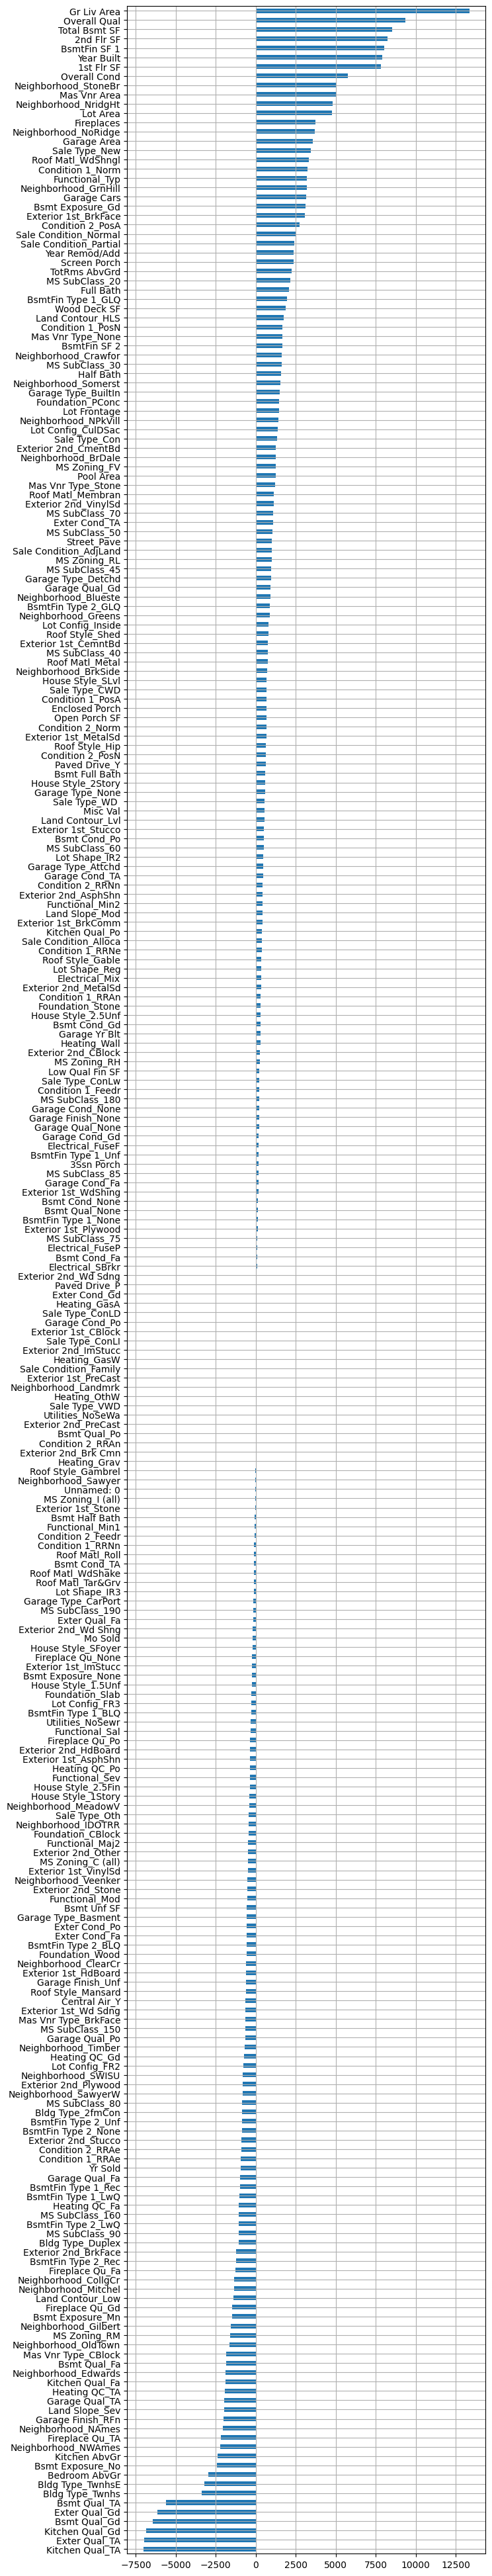

In [306]:
# I'm providing you the expected result; do not execute me!

`ElasticNet` combines `l1` and `l2` regularization. 
The `l1` penalty punishes the weights of certain features and shrinks their coefficients down to zero. Feature which are highly-correlated with the target preserve non-vanishing coefficients even after regularization.

# Outstanding!